<a href="https://colab.research.google.com/github/VictorTrigo/Estadistica-Computacional/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto CycleGAN

Author: Víctor Trigo

CycleGAN permite hacer transferencia de estilo.

Tipos de transferencia de estilo:
- Transferencia de estilo por ejemplo (un solo ejemplo)
- Transferencia de estilo por colecciones (conjuntos de estilos. ej. caballos y cebras): Pareadas o no pareadas.

GAN son redes generativas, pertenecientes a una rama del Deep Learning llamado Deep Learning Generativo. Busca crear imagenes que se parescan a un conjunto de imagenes reales.

Creadas por Ian Goodfellow.

Arquitectura:
- Red Generativa
- Red Discriminativa
- Juego a suma nula (pérdidas opuestas)

RG crea imagenes a partir de ruido blanco y RD intenta adivinar si la imagen es real. Uno gana y la otra pierde

Perdida en GANs
Elegir bien una funcion de perdida es escencial para un buen entrenamiento 

- Red discriminativa; entropia cruzada de las predicciones del discriminador.

$$ L_D \sim -log(D(x)) +-log(1-D(G(z))) $$

- Red generadora; inversa de la discriminativa (juego a suma nula)

$$ L_G \sim C + log(1-D(G(z)))  $$
$$ or -log(D(G(z))) $$

Donde $x$ es una imagen real y $z$ una generada. $C$ es cte

La tarea a realizar: Invierno a verano a invierno a ... del parque Yosemite

CycleGAN son 4 redes (Deep Convolutional GANs):
- G_x_y
- G_y_x
- D_x
- D_y




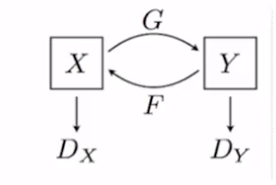

Primero necesitamos clonaremos el repositorio de CycleGAN  en GoogleDrive con Git. Luego descargaremos la base de datos llamada "summer2winter_yosemite".

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd '/gdrive/My Drive'

/gdrive/My Drive


In [ ]:
!git clone https://github.com/JuanPabloMF/dl-pytorch

Cloning into 'dl-pytorch'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Unpacking objects: 100% (36/36), done.


In [ ]:
!git clone https://github.com/aitorzip/PyTorch-CycleGAN.git

Cloning into 'PyTorch-CycleGAN'...
remote: Enumerating objects: 60, done.
remote: Total 60 (delta 0), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (60/60), done.


In [ ]:
%cd '/gdrive/My Drive/PyTorch-CycleGAN'

/gdrive/My Drive/PyTorch-CycleGAN


In [ ]:
%%sh
sh ./download_dataset summer2winter_yosemite

Archive:  ./datasets/summer2winter_yosemite.zip
   creating: ./datasets/summer2winter_yosemite/
   creating: ./datasets/summer2winter_yosemite/trainA/
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-01 10:31:48.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-07-01 23:43:46.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-27 21:50:52.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2016-09-12 21:34:08.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-06-10 23:35:46.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2016-07-12 13:57:26.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-05-13 02:35:47.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-07-12 20:23:26.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-08-26 00:23:12.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2011-05-19 11:26:37.jpg  
  inflating: ./datasets/summer2winter_yosemite/tr

./download_dataset: 5: ./download_dataset: [[: not found
for details.

--2022-07-03 03:16:04--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/summer2winter_yosemite.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132640856 (126M) [application/zip]
Saving to: ‘./datasets/summer2winter_yosemite.zip’

     0K .......... .......... .......... .......... ..........  0%  351K 6m9s
    50K .......... .......... .......... .......... ..........  0%  726K 4m34s
   100K .......... .......... .......... .......... ..........  0% 19.4M 3m5s
   150K .......... .......... .......... .......... ..........  0% 36.7M 2m19s
   200K .......... .......... .......... .......... ..........  0%  734K 2m27s
   250K .......... .......... .......... .......... ..........  0% 38.4M 2m3s
   300K .......... 

In [ ]:
!mv datasets/summer2winter_yosemite /gdrive/My\ Drive/dl-pytorch/datasets/

In [ ]:
!ls /gdrive/My\ Drive/dl-pytorch/datasets/

64x64_SIGNS.zip  summer2winter_yosemite


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 53.5 MB/s 
     |████████████████████████████████| 381 kB 66.4 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
!pip install visdom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 17.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=b5e31e66979786e27a96f3d1ccd1a523287ba9f0f288c9ca1403b197be87652b
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=c077b20549346ea813aad1a68b149b6754cca84c444cf3166ca8091d530d125b
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile


In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms

import sys
import glob
import random
import os
import itertools
from PIL import Image

from utils import ReplayBuffer
from livelossplot import PlotLosses
from utils import Logger

## Definiendo Red Generadora (Residual Blocks)

Los bloques residuales ayudan a dar profundidad a la red (y por lo tanto mayor capacidad de aprendizaje) lo que ayuda a evitar problemas en el entrenamiento como 'vanishing gradient', que ocurre cuando los gradientes se vuelven muy pequeños. Notar ademas que el tamaño del imput y el output son iguales.

In [ ]:
class ResidualBlock(nn.Module):
  def __init__(self, in_features):
    super(ResidualBlock, self).__init__()
    
    conv_block = [ nn.ReflectionPad2d(1), 
                   nn.Conv2d(in_features, in_features, 3),
                   nn.InstanceNorm2d(in_features), 
                   nn.ReLU(True),
                   nn.ReflectionPad2d(1), 
                   nn.Conv2d(in_features, in_features, 3),
                   nn.InstanceNorm2d(in_features)
                 ]
    
    self.conv_block = nn.Sequential(*conv_block)
  def forward(self, x):
    return self.conv_block(x) + x 

## Red Generadora y Decoder

Se define la red generadora con los siguientes parametros

- input_nc: canales de entrada
- output_nc: canales de salida
- n_residual_blocks: numero de bloques residuales (definido arriba), 9 por defecto

Contiene capas convolucionales, encoding, decoding y salida



In [ ]:
class Generator(nn.Module):
  def __init__(self, input_nc, output_nc, n_residual_blocks=9):
    super(Generator,self).__init__()
    
    # Bloqueconvolucional
    in_features = 64
    out_features = in_features * 2
    
    model = [ nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, 64, 7), # I - 7 + 6/1 + 1 = I (el tamaño de las imagenes sigue igual)
            nn.InstanceNorm2d(64),
             nn.ReLU(True)
            ]
    
    in_features = 64
    out_features = in_features * 2

    # Encoding 
    for _ in range(2):
      model += [ nn.Conv2d(in_features, out_features, 3, stride=2, padding=1), # I/2 (divide el tamaño de la imagen en 2)
                 nn.InstanceNorm2d(out_features),
                 nn.ReLU(True)
               ]
      in_features = out_features
      out_features = in_features*2

    # Transformaciones residuales
    for _ in range(n_residual_blocks):
      model += [ResidualBlock(in_features)] # agregar 9 bloques residuales
    
  
    # Decoding
    out_features = in_features// 2
    for _ in range(2):
      model += [ nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1), # 2I (duplica el tamaño de la imagen)
                 nn.InstanceNorm2d(out_features),
                 nn.ReLU(inplace=True)
               ]                            # agregar convoluciones traspuestas
      in_features = out_features
      out_features = in_features//2
  
    # Salida
    model += [ nn.ReflectionPad2d(3),
               nn.Conv2d(64, output_nc, 7), #I
               nn.Tanh()
             ]
      
    self.model = nn.Sequential(*model)
      
  def forward(self,x):
    return self.model(x)


## Red Discriminativa



In [ ]:
class Discriminator(nn.Module):
  "PatchGAN: discrimina estilo o textura"
  def __init__(self, input_nc):
    super(Discriminator, self).__init__()
    
    model = [ nn.Conv2d(input_nc, 64, 4, stride=2, padding=1), #I/2
              nn.LeakyReLU(0.2, inplace=True)
            ]
    
    model += [ nn.Conv2d(64, 128, 4, stride=2, padding=1), #I/2
               nn.InstanceNorm2d(128),
               nn.LeakyReLU(0.2, inplace=True)
             ]
    
    model += [ nn.Conv2d(128, 256, 4, stride=2, padding=1), #I/2
               nn.InstanceNorm2d(256),
               nn.LeakyReLU(0.2, inplace=True)
             ]
    
    model += [ nn.Conv2d(256, 512, 4, padding=1), #I-1
               nn.InstanceNorm2d(512),
               nn.LeakyReLU(0.2, inplace=True)
             ]
    
    # Flatten
    model += [nn.Conv2d(512, 1, 4, padding=1)] #I-1
    
    self.model = nn.Sequential(*model)
    
  def forward(self, x):
    x = self.model(x)
    return F.avg_pool2d(x, x.size()[2:]).view(x.size()[0], -1)

## Entrenamiento

Dado que este es aprendizaje generativo, el output no tendra target sino dos imagenes,.\

In [ ]:
class ImageDataset(Dataset):
  def __init__(self, base_dir, transform=None, split='train'):
    self.transform = transforms.Compose(transform)
    # Toma dos archivos con extencion (imagenes) desde el directorio dado
    self.files_A = sorted(glob.glob(os.path.join(base_dir, '{}/A/*.*'.format(split))))
    self.files_B = sorted(glob.glob(os.path.join(base_dir, '{}/B/*.*'.format(split))))
    
  def __len__(self):
    return max(len(self.files_A), len(self.files_B))
  
  def __getitem__(self,idx):
    image_A = self.transform(Image.open(self.files_A[idx]))
    image_B = self.transform(Image.open(self.files_B[random.randint(0,len(self.files_B)-1)]))
    return {'A': image_A, 'B': image_B}

In [ ]:
epoch = 0
n_epochs = 200
batch_size = 2
lr = 0.0002
size = 256
input_nc = 3
output_nc = 3
decay_epoch = 100

cuda = True
n_cpu = 8

base_dir = '/gdrive/My Drive/dl-pytorch/datasets/summer2winter_yosemite/'

In [ ]:
device = torch.device('cuda' if cuda else 'cpu')

def weights_init_normal(m):
  if isinstance(m, nn.Conv2d):
    torch.nn.init.normal(m.weight.data, 0.0, 0.02)
  elif isinstance(m, nn.BatchNorm2d):
    torch.nn.init.normal(m.weight.data, 1.0, 0.02)
    torch.nn.init.constant(m.bias, 0.0)
    
# Instanciar modelos
netG_A2B = Generator(input_nc, output_nc)
netG_B2A = Generator(input_nc, output_nc)
netD_A = Discriminator(input_nc)
netD_B = Discriminator(input_nc)

# Inicializar pesos
netG_A2B.apply(weights_init_normal)
netG_B2A.apply(weights_init_normal)
netD_A.apply(weights_init_normal)
netD_B.apply(weights_init_normal)

if cuda:
  netG_A2B.to(device)
  netG_B2A.to(device)
  netD_A.to(device)
  netD_B.to(device)
  
# Funciones de Perdida
criterion_GAN = torch.nn.MSELoss()
criterion_cycle = torch.nn.L1Loss()
criterion_identity = torch.nn.L1Loss()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """


## Optimizadores y Schedulers

In [ ]:
# Optimizadores: Las redes generativas comparten optimizador
optimizer_G = torch.optim.Adam(itertools.chain(netG_A2B.parameters(), netG_B2A.parameters()),
                              lr=lr, betas=(0.5, 0.999))
optimizer_D_A = torch.optim.Adam(netD_A.parameters(), lr=lr, betas=(0.5,0.999))
optimizer_D_B = torch.optim.Adam(netD_B.parameters(), lr=lr, betas=(0.5,0.999))

# Schedulers (actualizar el learning rate de forma dinamica durante el entrenamiento)
class LambdaLR():
  def __init__(self, n_epochs, offset, decay_start_epoch):
    assert ((n_epochs - decay_start_epoch) > 0)
    self.n_epochs = n_epochs
    self.offset = offset
    self.decay_start_epoch = decay_start_epoch
    
  def step(self, epoch):
    return 1 - max(0, epoch + self.offset - self.decay_start_epoch)/(self.n_epochs - self.decay_start_epoch)

lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, lr_lambda=LambdaLR(n_epochs,epoch,decay_epoch).step)
lr_scheduler_D_A = torch.optim.lr_scheduler.LambdaLR(optimizer_D_A, lr_lambda=LambdaLR(n_epochs,epoch,decay_epoch).step)
lr_scheduler_D_B = torch.optim.lr_scheduler.LambdaLR(optimizer_D_B, lr_lambda=LambdaLR(n_epochs,epoch,decay_epoch).step)

## Perdidas

In [ ]:
# Inputs and Targets
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor
target_real = Tensor(batch_size).fill_(1.0)
target_fake = Tensor(batch_size).fill_(0.0)

fake_A_buffer = ReplayBuffer()
fake_B_buffer = ReplayBuffer()

# Dataloader with data augmentation and normalize
transform = [ transforms.Resize(int(size*1.12), Image.BICUBIC),
              transforms.RandomCrop(size),
              transforms.RandomHorizontalFlip(),
              transforms.ToTensor(),
              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
            ]

dataloader = DataLoader(ImageDataset(base_dir,transform=transform),
                       batch_size=batch_size, shuffle=True, num_workers=n_cpu, drop_last=True)

# Loss Functions
def Gen_GAN_loss(G, D, real, loss, target_real):
  fake = G(real)
  pred_fake = D(fake)
  L = loss(pred_fake, target_real)
  return L, fake

def cycle_loss(G1, G2, real, loss):
  recovered = G2(G1(real))
  L = loss(recovered, real)
  return L

def identity_loss(G, real, loss):
  same = G(real)
  L = loss(same,real)
  return L

def Disc_GAN_loss(D2, fake2, real2, fake_2_buffer, loss, target_real, target_fake):
  pred_real = D2(real2)
  loss_D2_real = loss(pred_real, target_real)
  
  fake2 = fake_2_buffer.push_and_pop(fake2)
  pred_fake = D2(fake2.detach())
  loss_D2_fake = loss(pred_fake, target_fake)
  loss_D2 = (loss_D2_real + loss_D2_fake) * 0.5
  return loss_D2

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Entrenamiento y visualizacion del entrenamiento

In [ ]:
logger = Logger(n_epochs, len(dataloader), epoch=epoch)
liveloss= PlotLosses()

TypeError: ignored

In [ ]:
for epoch in range(epoch, n_epochs):
  for i, batch in enumerate(dataloader):
    real_A = batch['A'].to(device)
    real_B = batch['B'].to(device)
    
    # Redes Generativas
    optimizer_G.zero_grad()
    
    loss_GAN_A2B, fake_B = Gen_GAN_loss(netG_A2B, netD_B, real_A, criterion_GAN, target_real)
    loss_GAN_B2A, fake_A = Gen_GAN_loss(netG_B2A, netD_A, real_B, criterion_GAN, target_real)
    
    loss_cycle_ABA = cycle_loss(netG_A2B, netG_B2A, real_A, criterion_cycle)
    loss_cycle_BAB = cycle_loss(netG_B2A, netG_A2B, real_B, criterion_cycle)
    
    loss_identity_A = identity_loss(netG_B2A, real_A, criterion_identity)
    loss_identity_B = identity_loss(netG_A2B, real_B, criterion_identity)
    
    loss_G = (loss_GAN_A2B + loss_GAN_B2A) + 10.0*(loss_cycle_ABA + loss_cycle_BAB) + 5.0 *(loss_identity_A + loss_identity_B)
    loss_G.backward()
    
    optimizer_G.step()
    
    # Redes Discriminativas
    optimizer_D_A.zero_grad()
    
    loss_D_A = Disc_GAN_loss(netD_A, fake_A, real_A, fake_A_buffer, criterion_GAN, target_real, target_fake)
    loss_D_A.backward()
    optimizer_D_A.step()
    
    optimizer_D_B.zero_grad()
    
    loss_D_B = Disc_GAN_loss(netD_B, fake_B, real_B, fake_B_buffer, criterion_GAN, target_real, target_fake)
    loss_D_B.backward()
    optimizer_D_B.step()
    
    log_values = {'loss_G': loss_G,
                  'loss_G_identity': (loss_identity_A + loss_identity_B),
                  'loss_G_GAN': (loss_GAN_A2B + loss_GAN_B2A),
                  'loss_G_cyle': loss_cycle_ABA + loss_cycle_BAB,
                  'loss_D': loss_D_A + loss_D_B
                 }
    logger.log(log_values, images={'real_A': real_A,'real_B': real_B, 'fake_A': fake_A,'fake_B': fake_B  })
  
  liveloss.update(log_values)
  liveloss.draw()
    
  lr_scheduler_G.step()
  lr_scheduler_D_A.step()
  lr_scheduler_D_B.step()